In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [728]:
df= pd.read_csv('Cleaned_Laptop_data.csv')

In [729]:
df.shape

(896, 23)

In [730]:
df.sample(2)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
666,APPLE,MacBook,M1,M1,10th,8 GB,DDR4,512 GB,0 GB,Mac,...,13.3,1,No,No,104990,110900,5,4.7,6725,629
800,ASUS,VivoBook,AMD,Ryzen 5,Missing,8 GB,DDR4,256 GB,1024 GB,Windows,...,15.6,1,No,No,54990,78990,30,4.5,18,3


In [731]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [732]:
df['brand'].value_counts().index

Index(['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'APPLE', 'Avita', 'Vaio',
       'LG', 'Nokia', 'ALIENWARE', 'realme', 'Infinix', 'lenovo', 'Smartron',
       'MICROSOFT', 'RedmiBook', 'Mi', 'iball', 'SAMSUNG'],
      dtype='object')

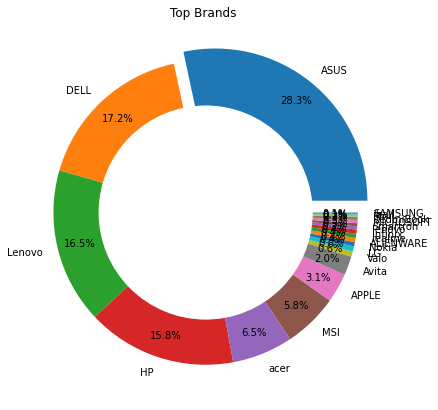

In [733]:
# create data
data = df['brand'].value_counts().values.tolist()
labels = df['brand'].value_counts().index.tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Create a pieplot
plt.pie(data, labels=labels,autopct='%1.1f%%',pctdistance=0.85,explode=explode)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top Brands ')
plt.show()

# 1. Conclusion: Brand Stats
- Asus topped the laptop market by 28.3%
- Dell, Lenovo, HP have almost eqaul market share
- Apple comes at 7th position
- Below brands needs to increase products(products less then 5):
  - 'LG','Vaio', 'realme', 'Nokia', 'Infinix', 'ALIENWARE', 'Smartron', 
      'lenovo', 'MICROSOFT', 'RedmiBook', 'Mi', 'SAMSUNG', 'iball'

In [734]:
(df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()

99.99999999999994

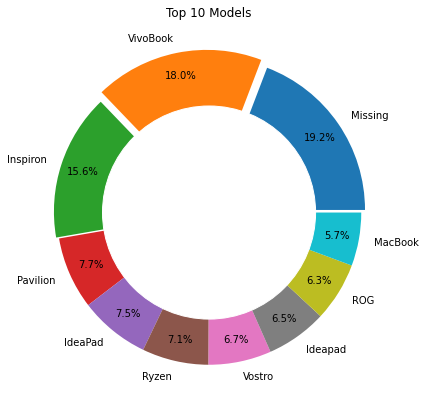

In [735]:
# create data
data = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).index.tolist()
total = (df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()
explode = (0.03,0.07 , 0.02, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Create a pieplot
plt.pie(data, labels=labels,autopct=lambda x: '{:.1f}%'.format((x*total)/100),pctdistance=0.85,explode=explode)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 10 Models')
plt.show()

# 2. Conclusion: Top Models Stats
- Vivobook model is the most demanded model,
- whereas, Inspiron, Pivillion, IdeaPad comes in top 5
- Around 19.3% are missing models, which may increase or decrease some model counts

In [736]:
df['processor_brand'].value_counts().values.tolist()

[660, 208, 24, 3, 1]

In [737]:

def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0] # total no of rows in data
    
    ax = sns.countplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value':
            b = a
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.1f}%'.format(a,(a/total_data)*100)
        else:
            b = ''
 
        ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None) # shift+tab for more parameter
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

In [738]:
def donut():
# create data
    data = df['processor_brand'].value_counts().values.tolist()
    labels = df['processor_brand'].value_counts().index.tolist()
    total = (df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()
    # explode = (0.03,0.07 , 0.02, 0, 0, 0, 0, 0, 0, 0)
#     plt.figure(figsize=(7,7))
    # Create a pieplot
    plt.pie(data, labels=labels,autopct='%.1f%%',pctdistance=0.85)
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
  

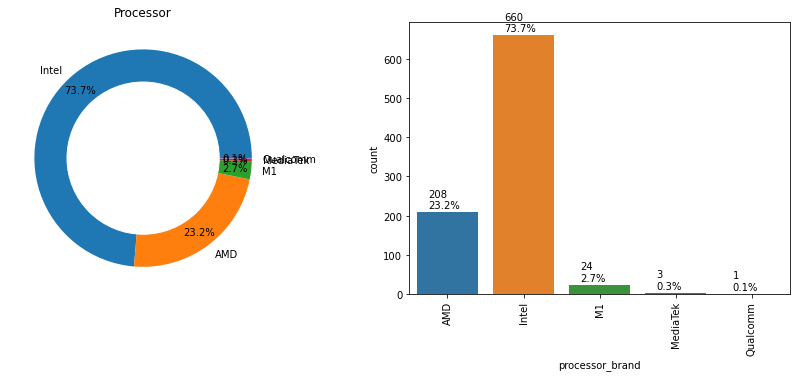

In [739]:
plt.figure(figsize=(15,5))
plt.subplot(121)
donut()
plt.title('Processor')
plt.subplot(122)
myBarPlot(df['processor_brand'],val_per='val_per',x_pos=0.15)


# 3. Conclusion: Processor Brand
- Intel topped the list
- Every 4 out 3 is a intel processor

In [740]:
df['processor_name'].value_counts().head(10)

Core i5         312
Core i3         170
Core i7         112
Ryzen 5          85
Ryzen 7          58
Ryzen 9          26
Ryzen 3          26
Celeron Dual     24
M1               24
Pentium Quad     14
Name: processor_name, dtype: int64

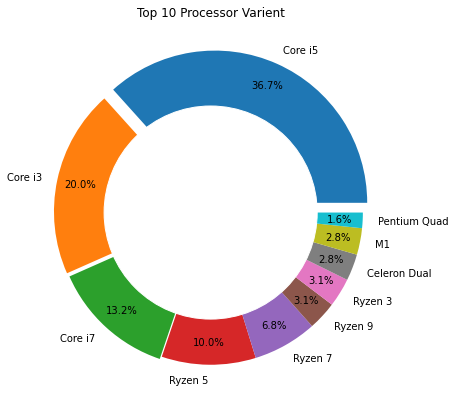

In [741]:
# create data
data = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).index.tolist()
total = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).sum()
explode = (0.07,0.03 , 0.02, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Create a pieplot
plt.pie(data, labels=labels,autopct=lambda x: '{:.1f}%'.format((x*total)/100),pctdistance=0.85,explode=explode)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 10 Processor Varient')
plt.show()

In [742]:

fig = px.pie(values=data, names=labels, title='Top 10 Processor Varient',hole=0.5,height=400,width=400)
fig.show()

# 4. Conclusion: Processor Name
- Core i5 have more no of model then others
- all top 3 are from same brand


In [743]:
fig = px.pie(values=df['processor_gnrtn'].value_counts().values.tolist(), names=df['processor_gnrtn'].value_counts().index.tolist(), title='Top 10 Processor Varient',height=400)
fig.show()

# Point to notice
- more than one third of total laptop are running on latest generation of processor
- where very few laptops are running on outdated processor

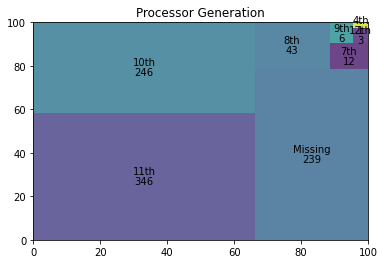

In [744]:
import squarify
squarify.plot(sizes=df['processor_gnrtn'].value_counts().values.tolist(),value=df['processor_gnrtn'].value_counts().values.tolist(), label=df['processor_gnrtn'].value_counts().index.tolist(), alpha=.8 )
plt.axis('on')
plt.title('Processor Generation')

plt.show()

# 5. Conclusion: Processor Generation
- most of the product are running on latest generation, 11th Gen processor

In [745]:
df['ram_gb'] = df['ram_gb'].astype(str) + ' GB'

In [746]:
fig = px.pie(values=df['ram_gb'].value_counts().values.tolist(), names=df['ram_gb'].value_counts().index.tolist(),opacity=0.9,hover_name=['8GB','4GB','16GB','32GB'],hole= 0.6,title='RAM',height=400,width=400)
fig.show()

In [747]:
fig = px.pie(values=df['ram_type'].value_counts().values.tolist(), names=df['ram_type'].value_counts().index.tolist(),opacity=0.9,hover_name=df['ram_type'].value_counts().index.tolist(),hole= 0.6,title='RAM',height=400,width=400)
fig.show()

In [748]:
fig = px.sunburst(df, path=['ram_gb', 'ram_type'], color='ram_gb',title='Operating Sytem and Its type ')
fig.show()

In [749]:
df['ram_type'].value_counts()

DDR4       760
LPDDR4X     66
LPDDR4      36
LPDDR3      14
DDR3        12
DDR5         8
Name: ram_type, dtype: int64

# conclusion: RAM vs It's type
- 50 % laptop running on 8gb ram,
- 85% are having DDR4 ram, toping in evering category of ram

In [750]:
df['ssd']= df['ssd'].astype(str)

In [751]:
value = df['ssd'].value_counts(dropna=False).sort_values().values.tolist()
index = df['ssd'].value_counts(dropna=False).sort_values().index.tolist()
fig = px.pie(df, values=value, names=index,
             title='SSD(gb) in Laptop',
             hover_data=[index],hole=0.4,height=400,width=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [752]:
df['hdd']= df['hdd'].astype(str)

In [753]:
value2 = df['hdd'].value_counts(dropna=False).sort_values().values.tolist()
labels2 = df['hdd'].value_counts(dropna=False).sort_values().index.tolist()
hdd = pd.DataFrame(list(zip(labels2, value2)),columns =['cap', 'val'])


In [754]:

fig = px.pie(hdd, values='val', names='cap',
             title='HDD(gb) in Laptop',
             hover_data=['val'],hole=0.4,height=400,width=400,labels={'cap':'HDD(gb)'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [755]:
fig = px.sunburst(df, path=['ssd', 'hdd'], color='os',title='SSD vs HDD: Inside SSD, Outside HDD ',width=500)
fig.show()

In [756]:
df[df['ssd']!='0 GB'].shape[0]

745

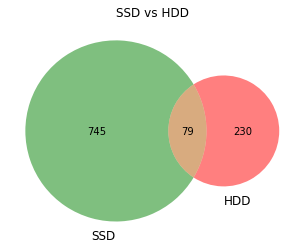

In [757]:
from matplotlib_venn import venn2

x = df[df['ssd']!='0 GB'].shape[0]
y = df[df['hdd']!='0 GB'].shape[0]
z = df[(df['ssd'] != '0 GB') & (df['hdd'] != '0 GB')].shape[0]

# Use the venn2 function
venn2(subsets = (x,y,z), set_labels = ('SSD', 'HDD'),set_colors=('g','r'),alpha=0.5)
plt.title('SSD vs HDD')
plt.show()

In [758]:
df['os'].fillna('Missing',inplace=True)

In [759]:
df['os'].value_counts(dropna=False)

Windows    832
DOS         36
Mac         28
Name: os, dtype: int64

In [760]:
df['os_bit']=df['os_bit'].astype(str)+'-bit'

In [761]:
fig = px.sunburst(df, path=['os', 'os_bit'], color='os',title='Operating Sytem and Its type ')
fig.show()

In [762]:
df['graphic_card_gb']=df['graphic_card_gb'].astype(str)

In [763]:
gc=df['graphic_card_gb'].value_counts().values.tolist()
gc2=df['graphic_card_gb'].value_counts().index.tolist()
grap = pd.DataFrame(list(zip(gc2, gc)),columns =['cap', 'val'])

In [764]:
fig = px.pie(grap, values='val', names='cap',
             title='Graphic Card in GB',
             hover_data=['val'],hole=0.4,height=400,width=400,labels={'cap':'HDD(gb)'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [765]:
fig = px.sunburst(df, path=['weight', 'display_size'], color='weight',title='Laptop Weight and Display Size')
fig.show()

In [766]:
df.sample().iloc[:,11:]

,graphic_card_gb,weight,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
187,0,Casual,Missing,0,No,No,20490,24990,18,3.9,637,91


In [767]:
fig = px.sunburst(df, path=['warranty', 'Touchscreen','msoffice'], color='warranty',title='Laptop Warranty year, Touchscreen and Pre-installed MS-Office')
fig.show()

In [768]:
fig = px.bar_polar(df, r="latest_price", theta="brand",
                   color=df['ram_gb'].str.replace(' GB','').astype(int), template="none",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,title='Latest Price by Brand Frequency and RAM')
fig.show()


In [769]:
fig = px.bar_polar(df, r="old_price", theta="brand",
                   color=df['ram_gb'].str.replace(' GB','').astype(int), template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,title='Old Price by Brand Frequency and RAM')
fig.show()


In [770]:
fig = px.bar_polar(df, r="discount", theta="brand",
                   color=df['ram_gb'].str.replace(' GB','').astype(int), template="plotly",
                   color_discrete_sequence= px.colors.sequential.Plasma_r,title='Price peak: Brand Frequency and RAM')
fig.show()


In [771]:
fig = px.sunburst(df, path=['brand', 'processor_brand','discount'], branchvalues='total',color='discount',template='plotly',title='Discount over Brand and Processor')
fig.show()

In [772]:
fig = px.bar(df, x='brand', y='latest_price',
             hover_data=['discount', 'old_price'], color='brand',
             labels={'brand':'Laptop'}, height=400,title='Total Sum of Latest by Brand')
fig.show()

In [773]:
fig = px.scatter(df, x="latest_price", y="discount", color="latest_price",
    size="old_price", size_max=45, log_x=True,title='Old vs New vs Discount: size=Old_price, color=New price')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.01
))

fig.show()

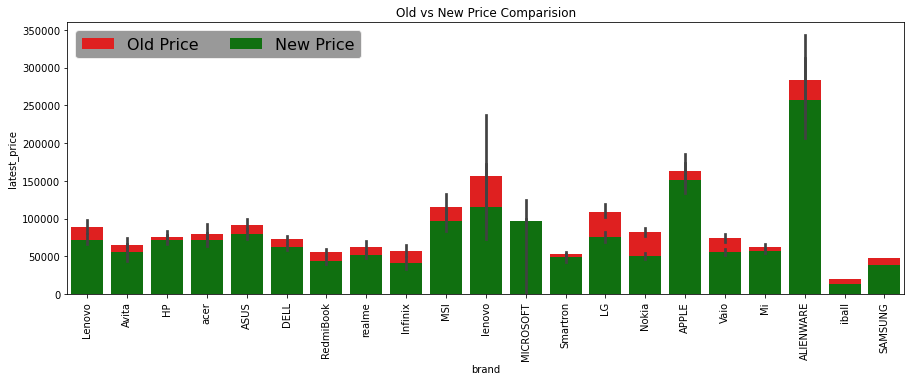

In [774]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['old_price'],x=df['brand'],color='red',label='Old Price')
sns.barplot(y=df['latest_price'],x=df['brand'],color='g',label='New Price')
plt.xticks(rotation=90)
plt.title('Old vs New Price Comparision')
plt.legend( ncol=2, facecolor='gray', edgecolor='#f6f5f5', loc='upper left', fontsize=16)
plt.show()

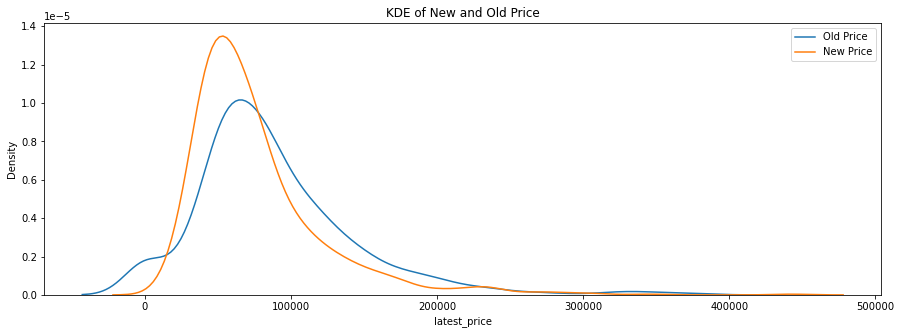

In [775]:
plt.figure(figsize=(15,5))
sns.distplot(df['old_price'],label='Old Price',hist=False)
sns.distplot(df['latest_price'],label='New Price',hist=False)
plt.title('KDE of New and Old Price')
plt.legend()

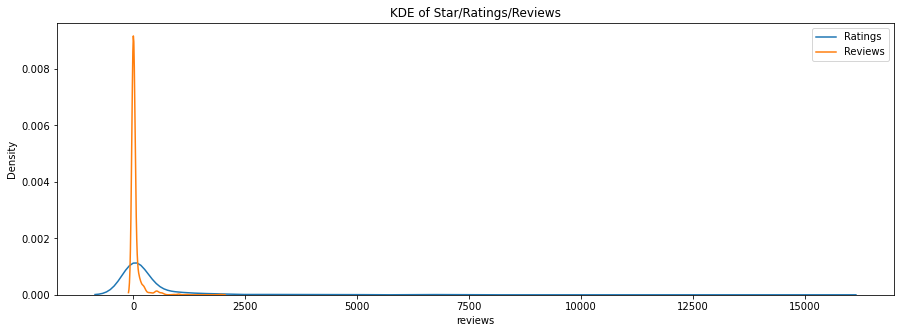

In [776]:
plt.figure(figsize=(15,5))
# sns.distplot(df['star_rating'],label='Star',hist=False)
sns.distplot(df['ratings'],label='Ratings',hist=False)
sns.distplot(df['reviews'],label='Reviews',hist=False)
plt.title('KDE of Star/Ratings/Reviews')
plt.legend()

<AxesSubplot:>

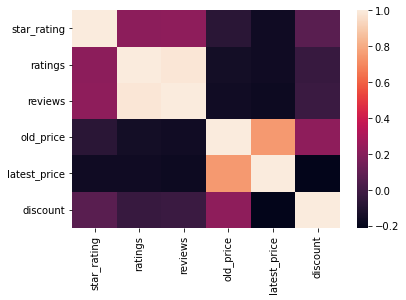

In [777]:
sns.heatmap(df[['star_rating','ratings','reviews','old_price','latest_price','discount']].corr())

In [778]:
fig = px.scatter_3d(df, x='latest_price', y='ratings', z='reviews',
              color='brand')
fig.show()

In [779]:
import plotly.graph_objects as go
fig = px.scatter(df, x="latest_price", y="ratings", color="ssd",
    size="reviews", size_max=45, log_x=True)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [780]:
df['latest_price']

0       24990
1       19590
2       19990
3       21490
4       24990
        ...  
891    144990
892    149990
893    142990
894     38990
895     57490
Name: latest_price, Length: 896, dtype: int64

In [787]:
df[df['brand']=='ALIENWARE']['latest_price'].sum()

1029460

In [788]:
df[df['brand']=='ASUS']['latest_price'].sum()

20122313

Text(0.5, 1.0, 'Histogram of Old and New Price')

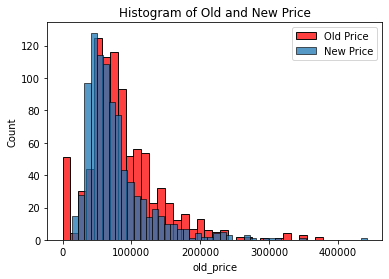

In [814]:
sns.histplot(df['old_price'],color='red',label='Old Price')
sns.histplot(df['latest_price'],label='New Price')
plt.legend()
plt.title('Histogram of Old and New Price')

In [801]:
fig = px.bar(df, x='brand', y='latest_price',
             hover_data=['old_price', 'discount'], color='latest_price',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [811]:
fig = px.bar(df, x="brand", y="latest_price",color='ram_gb',height=400)
fig.show()

In [820]:
# fig = px.treemap(df, path=[px.Constant("all"), 'brand', 'model', 'processor_brand', 'processor_name',
#        'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
#        'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
#        'msoffice', 'latest_price'], values='latest_price')
# fig.update_traces(root_color="lightgrey")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

In [825]:
fig = px.treemap(df, path=[px.Constant("Laptop"), 'brand', 'processor_name'], values='latest_price',
                  color='latest_price', hover_data=['os'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['latest_price'], weights=df['discount']),title='Hierarchical Data using nested rectangles')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [817]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [813]:
# df.to_csv('Cleaned_Laptop_data.csv',index=False)